In [1]:
import pandas as pd

## Problem 1: Remove duplicate records in the same table


In [2]:
# Import package
import recordlinkage

# For this demo let us use the inbuilt dataset from recordlinkage library
# import data set
from recordlinkage.datasets import load_febrl1

In [3]:
dfA = load_febrl1()
dfA.head()

,given_name,surname,street_number,address_1,address_2,suburb,postcode,state,date_of_birth,soc_sec_id
rec_id,,,,,,,,,,
rec-223-org,NaN,waller,6,tullaroop street,willaroo,st james,4011,wa,19081209,6988048
rec-122-org,lachlan,berry,69,giblin street,killarney,bittern,4814,qld,19990219,7364009
rec-373-org,deakin,sondergeld,48,goldfinch circuit,kooltuo,canterbury,2776,vic,19600210,2635962
rec-10-dup-0,kayla,harrington,NaN,maltby circuit,coaling,coolaroo,3465,nsw,19150612,9004242
rec-227-org,luke,purdon,23,ramsay place,mirani,garbutt,2260,vic,19831024,8099933


#### Sử dụng cột given_name để tạo Blocking


In [4]:
import recordlinkage

# Tạo chỉ mục Sorted Neighbourhood dựa trên cột 'given_name'
indexer = recordlinkage.Index()
indexer.sortedneighbourhood(left_on="given_name")
pairs = indexer.index(dfA)

# In số lượng cặp
print(len(pairs))

4378


In [5]:
# This cell can take some time to compute.
compare_cl = recordlinkage.Compare()
compare_cl.string("given_name", "given_name", method="jarowinkler", label="given_name")
compare_cl.string("surname", "surname", method="jarowinkler", label="surname")
compare_cl.exact("date_of_birth", "date_of_birth", label="date_of_birth")
compare_cl.exact("suburb", "suburb", label="suburb")
compare_cl.exact("state", "state", label="state")
compare_cl.string("address_1", "address_1", method="jarowinkler", label="address_1")
features = compare_cl.compute(pairs, dfA)
features.sample(5)

,,given_name,surname,date_of_birth,suburb,state,address_1
rec_id_1,rec_id_2,,,,,,
rec-188-dup-0,rec-217-org,1.000000,0.511111,0,0,0,0.508041
rec-396-org,rec-28-dup-0,1.000000,0.000000,0,0,0,0.277778
rec-361-dup-0,rec-183-dup-0,0.916667,0.000000,0,0,1,0.000000
rec-42-org,rec-333-org,1.000000,0.000000,0,0,0,0.521183
rec-311-dup-0,rec-348-org,1.000000,0.518519,0,0,1,0.640741


### Using ECM classifier


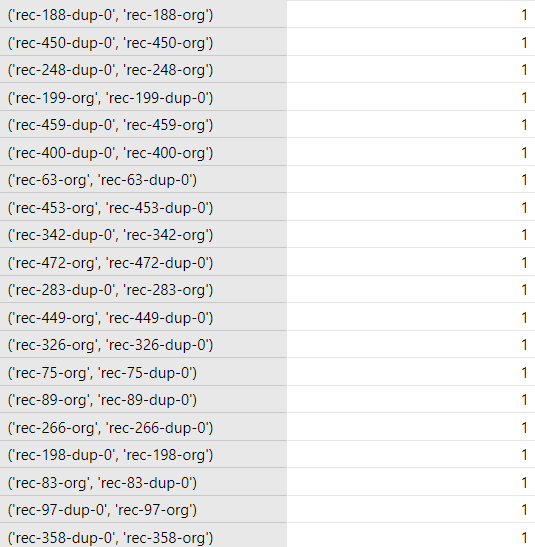


In [6]:
# select all the features except for given_name since its our blocking key
features1 = features[["suburb", "state", "surname", "date_of_birth", "address_1"]]

# Unsupervised learning – probabilistic
ecm = recordlinkage.ECMClassifier()
result_ecm = ecm.learn((features1).astype(int), return_type="series")
result_ecm

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17632\1306913360.py:6: UserWarning: learn is deprecated, ECMClassifier.fit_predict instead
  result_ecm = ecm.learn((features1).astype(int), return_type="series")


rec_id_1       rec_id_2     
rec-262-org    rec-225-org      0
rec-183-dup-0  rec-361-org      0
rec-179-dup-0  rec-370-dup-0    0
rec-483-dup-0  rec-102-org      0
rec-486-dup-0  rec-34-org       0
                               ..
rec-469-dup-0  rec-207-dup-0    0
               rec-207-org      0
rec-350-dup-0  rec-76-org       0
               rec-3-org        0
               rec-76-dup-0     0
Name: classification, Length: 4378, dtype: int32

## Problem 2: Merge records in different tables


In [7]:
from recordlinkage.datasets import load_febrl4

dfA, dfB = load_febrl4()

In [8]:
dfA.head()

,given_name,surname,street_number,address_1,address_2,suburb,postcode,state,date_of_birth,soc_sec_id
rec_id,,,,,,,,,,
rec-1070-org,michaela,neumann,8,stanley street,miami,winston hills,4223,nsw,19151111,5304218
rec-1016-org,courtney,painter,12,pinkerton circuit,bega flats,richlands,4560,vic,19161214,4066625
rec-4405-org,charles,green,38,salkauskas crescent,kela,dapto,4566,nsw,19480930,4365168
rec-1288-org,vanessa,parr,905,macquoid place,broadbridge manor,south grafton,2135,sa,19951119,9239102
rec-3585-org,mikayla,malloney,37,randwick road,avalind,hoppers crossing,4552,vic,19860208,7207688


In [9]:
dfB.head()

,given_name,surname,street_number,address_1,address_2,suburb,postcode,state,date_of_birth,soc_sec_id
rec_id,,,,,,,,,,
rec-561-dup-0,elton,NaN,3,light setreet,pinehill,windermere,3212,vic,19651013,1551941
rec-2642-dup-0,mitchell,maxon,47,edkins street,lochaoair,north ryde,3355,nsw,19390212,8859999
rec-608-dup-0,NaN,white,72,lambrigg street,kelgoola,broadbeach waters,3159,vic,19620216,9731855
rec-3239-dup-0,elk i,menzies,1,lyster place,NaN,northwood,2585,vic,19980624,4970481
rec-2886-dup-0,NaN,garanggar,NaN,may maxwell crescent,springettst arcade,forest hill,2342,vic,19921016,1366884


### Blocking: using the given_name column to create blocking pairs rather than using the entire table


In [10]:
# Same as explained previously, considering given_name as blocking index
# Tạo chỉ mục Sorted Neighbourhood dựa trên cột 'given_name'
indexer = recordlinkage.Index()
indexer.sortedneighbourhood(left_on="given_name")  # window là kích thước cửa sổ
pairs = indexer.index(dfA, dfB)
# In số lượng cặp
print(len(pairs))

96573


##### Using ECM classifier


In [11]:
# Explanation remains same
compare_cl = recordlinkage.Compare()

compare_cl.string("given_name", "given_name", method="jarowinkler", label="given_name")
compare_cl.string("surname", "surname", method="jarowinkler", label="surname")
compare_cl.exact("date_of_birth", "date_of_birth", label="date_of_birth")
compare_cl.exact("suburb", "suburb", label="suburb")
compare_cl.exact("state", "state", label="state")
compare_cl.string("address_1", "address_1", method="jarowinkler", label="address_1")


features = compare_cl.compute(pairs, dfA, dfB)
features.head(10)

given_name   surname  date_of_birth  suburb  \
rec_id_1     rec_id_2                                                      
rec-1070-org rec-308-dup-0     0.950000  0.490079              0       0   
rec-1016-org rec-3420-dup-0    0.625000  0.464286              0       0   
rec-4405-org rec-3861-dup-0    0.909524  0.577778              0       0   
             rec-3505-dup-0    0.909524  0.600000              0       0   
rec-1288-org rec-3301-dup-0    0.975000  0.000000              0       0   
rec-3585-org rec-1091-dup-0    0.885714  0.564815              0       0   
rec-298-org  rec-3086-dup-0    0.911111  0.483333              0       0   
             rec-2404-dup-0    0.911111  0.447619              0       0   
rec-2404-org rec-458-dup-0     0.694444  0.000000              0       0   
rec-453-org  rec-2994-dup-0    0.971429  0.601190              0       0   

                             state  address_1  
rec_id_1     rec_id_2                          
rec-1070-org rec-308-dup-0       1   0.667277  
rec-1016-org rec-3420-dup-0      0   0.490196  
rec-4405-org rec-3861-dup-0      0   0.530702  
             rec-3505-dup-0      1   0.603967  
rec-1288-org rec-3301-dup-0      0   0.419312  
rec-3585-org rec-1091-dup-0      0   0.505983  
rec-298-org  rec-3086-dup-0      0   0.531746  
             rec-2404-dup-0      0   0.687831  
rec-2404-org rec-458-dup-0       1   0.685714  
rec-453-org  rec-2994-dup-0      0   0.462626

In [12]:
# select all the features except for given_name since its our blocking key
features1 = features[["suburb", "state", "surname", "date_of_birth", "address_1"]]

# unsupervised learning - probablistic
ecm = recordlinkage.ECMClassifier()
result_ecm = ecm.learn((features1).astype(int), return_type="series")

result_ecm

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17632\1947882947.py:6: UserWarning: learn is deprecated, ECMClassifier.fit_predict instead
  result_ecm = ecm.learn((features1).astype(int), return_type="series")


rec_id_1      rec_id_2      
rec-1070-org  rec-308-dup-0     0
rec-1016-org  rec-3420-dup-0    0
rec-4405-org  rec-3861-dup-0    0
              rec-3505-dup-0    0
rec-1288-org  rec-3301-dup-0    0
                               ..
rec-1622-org  rec-2037-dup-0    0
rec-1604-org  rec-2431-dup-0    0
rec-1003-org  rec-1512-dup-0    0
rec-4883-org  rec-3706-dup-0    0
rec-66-org    rec-339-dup-0     0
Name: classification, Length: 96573, dtype: int32

##### Show the result of the merge operation

In [13]:
# Lấy các cặp bản ghi được ECMClassifier xác định là match (giá trị True)
matched_pairs = result_ecm[result_ecm == True].index

# Duyệt từng cặp và ghép lại để xem thông tin
matches_df = pd.DataFrame(
    [
        pd.concat([dfA.loc[i], dfB.loc[j]], axis=0, keys=["dfA", "dfB"])
        for i, j in matched_pairs
    ]
)

# Hiển thị kết quả
matches_df.reset_index(drop=True, inplace=True)
matches_df.head()

dfA                                             \
  given_name   surname street_number          address_1   
0      kynan    dooley            92    mcintyre street   
1    patrick    george             1       coxen street   
2      aidan    banham             8  rowntree crescent   
3     samuel  heidrich             7  mcgivern crescent   
4      tiana    lionis           207     holroyd street   

                                                                       \
                address_2         suburb postcode state date_of_birth   
0                  apt 27      woollahra     6021   qld      19310924   
1               belleview        urangan     4051   nsw      19371129   
2               locn 8774   tallebudgera     2284    wa      19280830   
3              el-woodaro       highbury     3053   act      19710525   
4  jewells medical centre  pennant hills     3463   qld      19990424   

                    dfB                                             \
  soc_sec_id given_name   surname street_number          address_1   
0    1493049      kynzn   doolqey            14    mcintyre street   
1    5526595   patrvrck    george            11        coxen stret   
2    5929976     aidank    banham             5  rowntree crescent   
3    8110080     samujl  heidrich             7  mcgivern crescent   
4    5662051     tiania    lionis           207      domain street   

                                                                       \
                address_2         suburb postcode state date_of_birth   
0                  apt 27      woollahra     6021   qld      19319924   
1               belleview        urangan     4051   nsw      19371129   
2               locn 8774            NaN     2284    wa      19280830   
3             el-wo odaro       highbury     3053   act      19710525   
4  jewells medical centre  pennant hills     3463   qld      19990424   

              
  soc_sec_id  
0    1493049  
1    5526595  
2    5929976  
3    8110080  
4    5662051